# 워드클라우드 

출처 https://www.youtube.com/watch?v=5P6nG8xHKbU

In [1]:
# %pip install konlpy
# %pip install tensorflow
# %pip install colletions
# %pip install wordcloud

In [2]:
from konlpy.tag import Mecab 
import MeCab
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from matplotlib import font_manager, rc
from wordcloud import WordCloud

### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('./네이버쇼핑몰 칫솔-동호/네이버 쇼핑몰 칫솔 전처리완료-동호.csv',index_col=0)

In [4]:
df = df.drop_duplicates(['내용'])
df = df.reset_index(drop=True)
df

,내용,날짜,별점,재구매,한달사용기,종류
0,일반형은 확실히 뻣뻣하구요 슬림형이 부드럽구 좋아요 전 한달만사용하구 바로바로 교체...,2019-07-03,4,0,1,3
1,어금니일반형 우연히치과에서 써보구좋아 찾아보니 파네요 아이들 이관리해주기 딱좋은 ...,2019-07-04,5,0,0,4
2,저번에 구매 하였다가 잃어버려서 다시 구매 하였어요! 교정중인데 구석구석 잘 닦이구...,2019-07-08,5,1,0,4
3,칫솔모가 가늘면서도 짱짱해요^^ 기존엔 시스테마등을 사용했는데 전 이곳 칫솔이 훨씬...,2019-07-09,5,0,0,1
4,온가족의 이를 책임지네요ㅎㅎ 이거써본후로는 여기서만 사요 강추,2019-07-14,5,0,0,2
...,...,...,...,...,...,...
44955,헤드가 좀 크지만 좋아요,2022-05-09,5,0,0,4
44956,배송빠릅니다 물건좋습니다,2022-05-09,5,0,0,2
44957,중학교 다니는 애가 최근에 교정해서 구입해 사용중인데 만족합니다.,2022-05-09,5,0,1,1
44958,배송도 빠르고 저렴한 가격으로 좋아요,2022-05-09,4,0,0,3


### 2. mecab을 통해 단어추출

In [5]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [6]:
# 불용어 지정
stop_words=['달','사용','개','칫솔','거','배송','구매','구석구석','중','것','여기','수','때','게','하나','시작','후','양치',
'번','닦','데','미','듯','전','날','끝','천','원','치','앞','날','저','쪽','이','분','건','제','나','년','쭉','톤','편','일','만']

In [7]:
nouns = []
for i in df['내용']:
    for noun in tagger.nouns(i):
        if noun not in stop_words:
            nouns.append(noun)
nouns[:10]

['일반', '슬림형', '교체', '모', '이상', '어금니', '일반', '치과', '아이', '관리']

In [12]:
noun_counts = Counter(nouns)
top_noun = dict(noun_counts.most_common(70))

### 3. 시각화

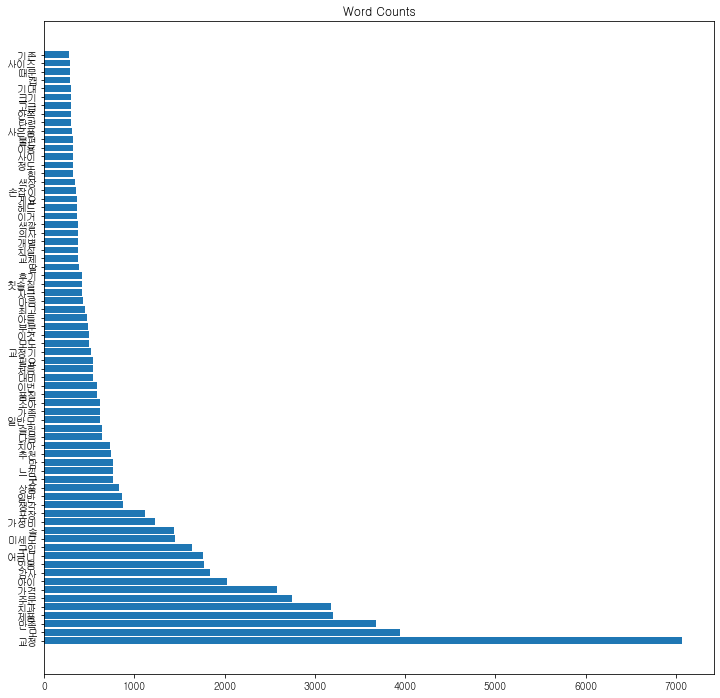

In [13]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

y_pos = np.arange(len(top_noun))

plt.figure(figsize = (12,12))
plt.barh(y_pos, top_noun.values())
plt.title('Word Counts')
plt.yticks(y_pos, top_noun.keys())
plt.show()

In [14]:
wc = WordCloud(background_color='white', font_path="C:/Users/User/AppData/Local/Microsoft/Windows/Fonts/THERather than flowers.ttf")
wc.generate_from_frequencies(top_noun)

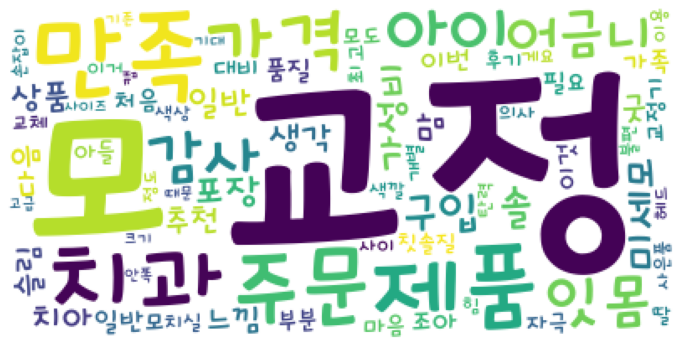

In [15]:
figure = plt.figure(figsize=(12,12))
ax = figure.subplots()
ax.axis('off')
ax.imshow(wc)
plt.show()